## Насонов Иван - 13 вариант

In [1]:
import numpy as np
import random

### Задание 1

In [2]:
products = ['автомобиль HAVAL', 'обувь', 'одежда', 'телефоны']
prices = [20000, 3000, 45600, 5000]

In [3]:
variant = 13

sales = []
for _ in range(len(products)):
    sales.append([random.randint(0, variant+100) for i in range(100_000)])

for i in range(len(sales)):
    print(products[i], sales[i][:15])

summ_py = []

автомобиль HAVAL [85, 56, 88, 16, 71, 37, 23, 20, 34, 77, 16, 107, 73, 9, 89]
обувь [96, 67, 82, 23, 26, 67, 22, 98, 71, 20, 43, 20, 5, 108, 38]
одежда [60, 59, 65, 11, 17, 32, 18, 14, 111, 91, 97, 30, 101, 60, 108]
телефоны [28, 97, 19, 47, 61, 79, 40, 50, 93, 90, 80, 87, 97, 96, 74]


##### Классический python

In [4]:
%%timeit

for i in range(len(sales)):
    sum_item = 0
    for j in range(len(sales[i])):
        sum_item += prices[i] * sales[i][j]
    summ_py.append(sum_item)

44.4 ms ± 606 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
for i in range(len(sales)):
    print("Продажи ", products[i], summ_py[i])

Продажи  автомобиль HAVAL 112801020000
Продажи  обувь 16957533000
Продажи  одежда 258100377600
Продажи  телефоны 28164860000


##### Numpy

In [6]:
products = np.array(products)
prices = np.array(prices)
sales = np.array(sales)
summ_np = []

In [8]:
%%timeit

for i in range(sales.shape[0]):
    summ_np.append(np.sum(prices[i] * sales[i]))

208 µs ± 4.31 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [9]:
for i in range(len(sales)):
    print("Продажи ", products[i], summ_np[i])

Продажи  автомобиль HAVAL 112801020000
Продажи  обувь 16957533000
Продажи  одежда 258100377600
Продажи  телефоны 28164860000


##### Numpy с агрегацией

In [10]:
summ_ag = []

In [14]:
%%timeit

for i in range(sales.shape[0]):
    summ_ag.append(sales[i].sum() * prices[i])

64.6 µs ± 560 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [15]:
for i in range(len(sales)):
    print("Продажи ", products[i], summ_ag[i])

Продажи  автомобиль HAVAL 112801020000
Продажи  обувь 16957533000
Продажи  одежда 258100377600
Продажи  телефоны 28164860000


### Задание 2

##### Моя реализация

In [24]:
sort_arr = np.random.randint(low=-100, high=100, size=(50,))
sort_arr[:10]

array([53, 63,  9, -1, 79, 48, 81, 55, 28, 63])

In [21]:
def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and arr[i] < arr[l]:
        largest = l

    if r < n and arr[largest] < arr[r]:
        largest = r

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

In [26]:
%%timeit
heap_sort(np.random.randint(low=-100, high=100, size=(50,)))

189 µs ± 1.49 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


##### Реализация np.sort

In [25]:
%%timeit
np.sort(np.random.randint(low=-100, high=100, size=(50,)))

11.8 µs ± 62.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


##### Реализация heapq через python

In [27]:
import heapq

def HeapSort(arr):
    heapq.heapify(arr)
    result = []
    while arr:
        result.append(heapq.heappop(arr))
    return result

In [29]:
%%timeit
HeapSort([random.randint(-100, 100) for i in range(50)])

38.1 µs ± 37.4 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Задание 3

In [36]:
data_drinks = np.loadtxt("data/drinks.csv",
                 delimiter=",", dtype=str)

data_drinks[:5]

array([['country', 'beer_servings', 'spirit_servings', 'wine_servings',
        'total_litres_of_pure_alcohol'],
       ['Afghanistan', '0', '0', '0', '0.0'],
       ['Albania', '89', '132', '54', '4.9'],
       ['Algeria', '25', '0', '14', '0.7'],
       ['Andorra', '245', '138', '312', '12.4']], dtype='<U28')

In [39]:
data_arr = np.zeros(
    data_drinks.shape[0] - 1,
    dtype={
        "names" : ['country', 'beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol'],
        "formats" : ["U28", "i4", "i4", "i4", "f8"]
    }
)

In [45]:
data_arr['country'] = data_drinks[1:, [0]].reshape(data_drinks.shape[0] - 1,)
data_arr['beer_servings'] = [int(i) for i in data_drinks[1:, [1]]]
data_arr['spirit_servings'] = [int(i) for i in data_drinks[1:, [2]]]
data_arr['wine_servings'] = [int(i) for i in data_drinks[1:, [3]]]
data_arr['total_litres_of_pure_alcohol'] = [float(i) for i in data_drinks[1:, [4]]]

In [42]:
print(
    "Больше всего пива",
    data_arr[data_arr['beer_servings'] == data_arr['beer_servings'].max()]['country'], '=',
    data_arr['beer_servings'].max()
)

print(
    "Больше всего джина",
    data_arr[data_arr['spirit_servings'] == data_arr['spirit_servings'].max()]['country'],
    data_arr['spirit_servings'].max()
)

print(
    "Больше всего вина",
    data_arr[data_arr['wine_servings'] == data_arr['wine_servings'].max()]['country'],
    data_arr['wine_servings'].max()
)

print(
    "Больше всего суммарное потребление алкоголя",
    data_arr[data_arr['total_litres_of_pure_alcohol'] == data_arr['total_litres_of_pure_alcohol'].max()]['country'],
    data_arr['total_litres_of_pure_alcohol'].max()
)

Больше всего пива ['Namibia'] = 376
Больше всего джина ['Grenada'] 438
Больше всего вина ['France'] 370
Больше всего суммарное потребление алкоголя ['Belarus'] 14.4


### Задание 4

Я не согласен что проклятия в фильмах это все данные типа `word`. Например слова `dick`, `dicks`, `chickenshit`, `cockblockery`, `cocksucker` или `cunt` не похожи на проклятия. Поэтому в этом задании я буду делать отсев по словам схожих со словом `fuck`

In [112]:
data_tr = np.loadtxt("data/tarantino.csv",
                 delimiter=",", dtype=str)

data_tr[:5]

array([['movie', 'type', 'word', 'minutes_in'],
       ['Reservoir Dogs', 'word', 'dick', '0.40'],
       ['Reservoir Dogs', 'word', 'dicks', '0.43'],
       ['Reservoir Dogs', 'word', 'fucked', '0.55'],
       ['Reservoir Dogs', 'word', 'fucking', '0.61']], dtype='<U19')

In [44]:
data_arr_t = np.zeros(
    data_tr.shape[0] - 1,
    dtype={
        "names" : ['movie', 'type', 'word', 'minutes_in'],
        "formats" : ["U28", "U16", "U16", "f8"]
    }
)

In [47]:
data_arr_t['movie'] = data_tr[1:, [0]].reshape(data_tr.shape[0] - 1,)
data_arr_t['type'] = data_tr[1:, [1]].reshape(data_tr.shape[0] - 1,)
data_arr_t['word'] = data_tr[1:, [2]].reshape(data_tr.shape[0] - 1,)
data_arr_t['minutes_in'] = [float(i) for i in data_tr[1:, [3]]]

Определяем число проклятий, летальных исходов и их отношение по фильмам 

In [85]:
import re

print(
    "Число проклятий во всех фильмам",
    len(re.findall(r'fuc\w+', str([i for i in data_arr_t['word']])))
)

print(
    "Число смертей во всех фильмах",
    len(re.findall(r'death', str([i for i in data_arr_t['type']])))
)

Число проклятий во всех фильмам 772
Число смертей во всех фильмах 190


In [96]:
unique_movies = np.array(list(set(data_arr_t['movie'])))

for movie in unique_movies:
    print("Проклятий в фильме", movie, '-',
          len(re.findall(r'fuc\w+', str([i for i in data_arr_t[data_arr_t['movie'] == movie]['word']]))))
    print("Смертей в фильме", movie, '-',
          len(re.findall(r'death', str([i for i in data_arr_t[data_arr_t['movie'] == movie]['type']]))), '\n')

Проклятий в фильме Jackie Brown - 140
Смертей в фильме Jackie Brown - 4 

Проклятий в фильме Kill Bill: Vol. 1 - 17
Смертей в фильме Kill Bill: Vol. 1 - 63 

Проклятий в фильме Django Unchained - 32
Смертей в фильме Django Unchained - 47 

Проклятий в фильме Inglorious Basterds - 21
Смертей в фильме Inglorious Basterds - 48 

Проклятий в фильме Reservoir Dogs - 271
Смертей в фильме Reservoir Dogs - 10 

Проклятий в фильме Pulp Fiction - 267
Смертей в фильме Pulp Fiction - 7 

Проклятий в фильме Kill Bill: Vol. 2 - 24
Смертей в фильме Kill Bill: Vol. 2 - 11 



Определяем частоту употребления конкретных прокрятий 

In [104]:
unique_fucks = np.array(list(set(re.findall(r'fuc\w+', str([i for i in data_arr_t['word']])))))

for fuck in unique_fucks:
    print("Всего проклятий ", fuck, '-',
          len(data_arr_t[data_arr_t['word'] == fuck]))

Всего проклятий  fuckup - 1
Всего проклятий  fucker - 8
Всего проклятий  fuckers - 1
Всего проклятий  fucks - 3
Всего проклятий  fuckface - 1
Всего проклятий  fuck - 213
Всего проклятий  fucking - 407
Всего проклятий  fuckhead - 1
Всего проклятий  fucked - 25


Определяем распределение времени между проклятиями 

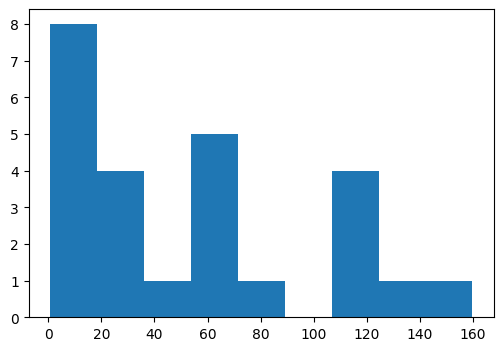

In [144]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(6,4))
n_bins = len(unique_fucks)

axs.hist([float(i) for i in data_arr_t[data_arr_t['word'] == fuck]['minutes_in']], bins=n_bins)
plt.show()